In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False 


In [3]:
test = pd.read_csv('D:data/沪市/新华网(603888).csv',parse_dates=True,engine = 'python')
test.sort_values(by='日期', inplace=True, ascending=True)
test.loc[:, '日期'] = pd.to_datetime(test['日期'],format='%Y-%m-%d')
#test.reset_index(drop=True)
test.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
575,2016-10-28,'603888,N新华网,39.87,39.87,33.23,33.23,27.69,12.18,43.987,0.0379,19668,770219.0,8.277480e+09,2.069370e+09
574,2016-10-31,'603888,新华网,43.86,43.86,43.86,43.86,39.87,3.99,10.0075,0.0223,11600,508776.0,9.105851e+09,2.276463e+09
573,2016-11-01,'603888,新华网,48.25,48.25,48.25,48.25,43.86,4.39,10.0091,0.0164,8530,411573.0,1.001727e+10,2.504317e+09
572,2016-11-02,'603888,新华网,53.08,53.08,53.08,53.08,48.25,4.83,10.0104,0.0189,9815,520980.0,1.102003e+10,2.755008e+09
571,2016-11-03,'603888,新华网,58.39,58.39,58.39,58.39,53.08,5.31,10.0038,0.0413,21440,1251882.0,1.212245e+10,3.030612e+09


In [4]:
test = test.set_index([[x for x in range(len(test))]])

In [5]:
test.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            566, 567, 568, 569, 570, 571, 572, 573, 574, 575],
           dtype='int64', length=576)

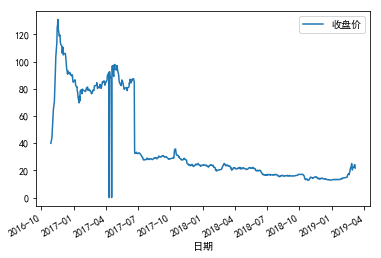

In [6]:
test[['日期','收盘价']].plot(x = '日期', y = '收盘价')

In [7]:
test['收盘价'][0:5]

0    39.87
1    43.86
2    48.25
3    53.08
4    58.39
Name: 收盘价, dtype: float64

In [8]:
#平均绝对离差
def avedev(closeprice,period):
    avedev_list = [0 for x in range(len(closeprice))]
    #avedev_list_ = [0 for x in range(len(closeprice))]
    for i in range(period-1,len(closeprice)):
        for j in range(period):
            avedev_list[i] = avedev_list[i] + abs((closeprice[i-j]-closeprice[i-period+1:i+1].mean())/period)
        
    return avedev_list

In [9]:
avedev(test['收盘价'],5)

[0,
 0,
 0,
 0,
 5.636,
 6.198400000000001,
 6.8160000000000025,
 7.4967999999999995,
 8.247199999999998,
 9.071199999999997,
 9.977600000000002,
 10.972800000000001,
 12.070399999999998,
 11.145600000000002,
 9.16,
 4.182399999999996,
 3.012799999999998,
 3.8960000000000043,
 4.081599999999997,
 2.311200000000005,
 2.6960000000000037,
 3.139200000000008,
 3.1111999999999997,
 2.8655999999999975,
 2.319999999999996,
 2.3071999999999946,
 1.5623999999999938,
 1.6024,
 1.5752000000000037,
 0.3416000000000025,
 0.7063999999999993,
 3.658399999999995,
 5.463200000000004,
 5.776000000000002,
 3.610400000000001,
 1.1951999999999998,
 1.1144000000000007,
 0.627200000000002,
 0.5312000000000041,
 0.5824000000000013,
 0.4799999999999983,
 0.8071999999999946,
 0.7287999999999981,
 0.3904000000000025,
 1.1863999999999975,
 2.0888000000000004,
 2.1616000000000013,
 1.3511999999999915,
 0.4576000000000021,
 1.1344000000000023,
 2.020000000000002,
 2.1744,
 2.0512,
 2.054400000000001,
 2.40639999999

In [10]:
#平均绝对离差，pandas版
def ave_mad(closeprice,period):
    ave_mad_list = [0 for x in range(len(closeprice))]
    for i in range(period-1,len(closeprice)):
        ave_mad_list[i] = closeprice[i-period+1:i+1].mad()
        
    return ave_mad_list

In [158]:
ave_mad(test['收盘价'],5)

[0,
 0,
 0,
 0,
 1.2287999999999997,
 0.4328000000000003,
 0.38640000000000185,
 0.488000000000001,
 0.5504000000000004,
 0.5256000000000001,
 0.2800000000000004,
 0.2704000000000001,
 0.2,
 0.14080000000000012,
 0.20319999999999894,
 0.4192,
 0.48560000000000014,
 0.3408000000000008,
 0.5199999999999996,
 0.7648000000000004,
 0.6368000000000003,
 0.3720000000000006,
 0.3768000000000001,
 0.30399999999999994,
 0.20479999999999948,
 0.18000000000000044,
 0.16799999999999926,
 0.11440000000000054,
 0.09840000000000089,
 0.11520000000000082,
 0.14880000000000065,
 0.2288000000000004,
 0.17120000000000032,
 0.1304000000000002,
 0.13599999999999995,
 0.15120000000000075,
 0.08079999999999998,
 0.06799999999999926,
 0.15360000000000157,
 0.28320000000000006,
 0.27519999999999956,
 0.25759999999999933,
 0.16959999999999908,
 0.1647999999999996,
 0.1632000000000005,
 0.32479999999999976,
 0.7527999999999999,
 0.9743999999999999,
 0.8104000000000007,
 0.46240000000000026,
 0.4087999999999994,
 

In [11]:
test['avedev-5'] =avedev(test['收盘价'],5) 
test['ave_mad-5'] = ave_mad(test['收盘价'],5)

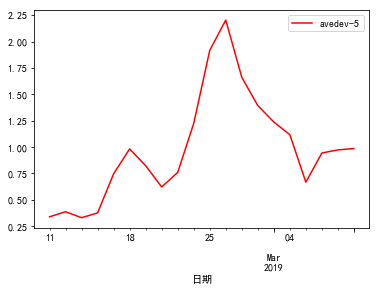

In [12]:
test[['日期','avedev-5']][-20:].plot(x = '日期',y = 'avedev-5',color = 'r')
#ax = test['ave_mad-5'][-20:].plot(color = 'b')


In [13]:
#简单移动平均值
def sma(closeprice,period):
    sma_list = [0 for x in range(len(closeprice))]
    for i in range(period-1,len(closeprice)):
        sma_list[i] =  closeprice[i-period+1:i+1].mean()
        
    return sma_list

In [163]:
sma(test['收盘价'],5)

[0,
 0,
 0,
 0,
 20.094,
 19.408,
 18.895999999999997,
 18.65,
 18.442,
 18.088,
 17.75,
 17.671999999999997,
 17.52,
 17.445999999999998,
 17.645999999999997,
 17.826,
 18.052,
 18.184,
 18.03,
 17.786,
 17.564,
 17.28,
 17.284,
 17.46,
 17.584,
 17.62,
 17.65,
 17.498,
 17.462,
 17.476,
 17.503999999999998,
 17.644,
 17.716,
 17.774,
 17.759999999999998,
 17.722,
 17.594,
 17.56,
 17.616000000000003,
 17.746000000000002,
 17.756,
 17.882,
 18.022000000000002,
 18.026,
 18.023999999999997,
 18.328,
 18.764,
 19.262,
 19.677999999999997,
 20.197999999999997,
 20.694,
 20.956,
 21.116,
 21.298,
 21.328,
 21.144,
 21.344,
 21.576,
 21.810000000000002,
 22.238000000000003,
 22.63,
 22.516,
 22.360000000000003,
 22.116000000000003,
 21.607999999999997,
 21.204,
 20.967999999999996,
 20.794,
 20.877999999999997,
 21.046,
 21.208,
 21.368,
 21.467999999999996,
 21.462,
 21.542,
 21.621999999999996,
 21.749999999999996,
 21.874000000000002,
 21.882,
 17.526000000000003,
 17.328,
 16.984,
 16.

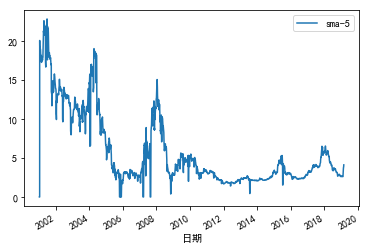

In [164]:
test['sma-5'] = sma(test['收盘价'],5)
test[['日期','sma-5']].plot(x= '日期',y = 'sma-5')

In [68]:
#指数平滑移动平均值
def ema(closeprice,period):
    ema_list = [0 for x in range(len(closeprice))]
    for i in range(len(closeprice)):
        if i == 0:
            ema_list[i] = closeprice[i]
        else:
            ema_list[i] = closeprice[i]*(2/(period+1))+ema_list[i-1]*((period-1)/(period+1))
            
    return ema_list

In [165]:
ema(test['收盘价'],5)

[22.77,
 22.009999999999998,
 21.133333333333333,
 20.392222222222223,
 19.901481481481483,
 19.34,
 18.869999999999997,
 18.629999999999995,
 18.376666666666665,
 17.967777777777776,
 17.65,
 17.61333333333333,
 17.538888888888884,
 17.52592592592592,
 17.733950617283945,
 18.55,
 18.59,
 18.41,
 17.85,
 17.543333333333333,
 17.44,
 17.376666666666665,
 17.607777777777777,
 17.608518518518515,
 17.58901234567901,
 17.62,
 17.546666666666667,
 17.467777777777776,
 17.455185185185183,
 17.51012345679012,
 17.76,
 17.873333333333335,
 17.805555555555557,
 17.777037037037037,
 17.70135802469136,
 17.57,
 17.53333333333333,
 17.52222222222222,
 17.681481481481477,
 17.85432098765432,
 17.62,
 17.776666666666664,
 17.917777777777776,
 17.95185185185185,
 18.031234567901233,
 19.14,
 19.516666666666666,
 19.907777777777774,
 19.97185185185185,
 20.244567901234564,
 21.62,
 21.606666666666666,
 21.567777777777778,
 21.381851851851852,
 21.23456790123457,
 20.7,
 21.326666666666664,
 21.767777

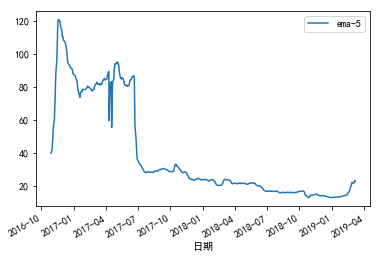

In [71]:
test['ema-5'] = ema(test['收盘价'],5)
test[['日期','ema-5']].plot(x= '日期',y = 'ema-5')

In [64]:
#序列最大值
def hhv(closeprice,period):
    hhv_list = [0 for x in range(len(closeprice))]
    for i in range(period-1,len(closeprice)):
        hhv_list[i] = max(closeprice[i+1-period:i+1]) 
        
    return hhv_list
#序列最小值
def llv(closeprice,period):
    llv_list = [0 for x in range(len(closeprice))]
    for i in range(period-1,len(closeprice)):
        llv_list[i] = min(closeprice[i+1-period:i+1]) 
        
    return llv_list

In [66]:
#动态移动平均值
def dma(closeprice,weight):
    #closeprice 为输入的数据矩阵
    #weight为权重参数，表示当前序列值的权重，0<weight<1,weight为小数
    dma_list = [0 for x in range(len(closeprice))]
    for i in range(len(closeprice)):
        if i == 0:
            dma_list[i] == closeprice[i]
        else:
            dma_list[i] = weight*closeprice[i]+dma_list[i-1]*(1-weight)
            
    return dma_list

In [69]:
#指数移动平均值
def edma(closeprice,period,weight):
    #1<=weight<==period
    edma_list = [0 for x in range(len(closeprice))]
    for i in range(len(closeprice)):
        if i == 0:
            edma_list[i] = closeprice[i]
        else:
            edma_list[i] = closeprice[i]*(weight/(period+1))+edma_list[i-1]*((period-weight)/(period))
            
    return edma_list

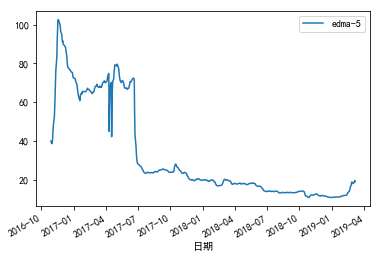

In [70]:
test['edma-5'] = edma(test['收盘价'],5,2)
test[['日期','edma-5']].plot(x= '日期',y = 'edma-5')

# 量化投资趋向指标

## 升降线（ACD）是分析股票收盘价与股票最高价、股票最低价间关系的指标。
升降线指标（ACD）下降，而股票价格上升时，此时投资者可以卖出手中股票；升降线指标（ACD）上升，而股票价格下降时，投资者可以考虑买入该股票；
升降线（ACD）指标上穿其20日均线时，为买入信号；升降线（ACD）指标下穿其20日均线时，为卖出信号。

In [16]:
def ACD(highprice,lowprice,closeprice):
    dif = closeprice.copy()
    acd = [0 for x in range(len(closeprice))]
    for i in range(1,len(closeprice)):
        if closeprice[i]>closeprice[i-1]:
            dif[i] = closeprice[i]-min(lowprice[i],closeprice[i-1])
        else:
            dif[i] = closeprice[i]-max(highprice[i],closeprice[i-1])
        
        if closeprice[i] == closeprice[i-1]:
            acd[i] = acd[i-1]
        else:
            acd[i] = acd[i-1]+dif[i]
    
    del dif
    return acd

In [17]:
quant_test = test[test['日期']>'2018'].copy()
quant_test.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,avedev-5,ave_mad-5
290,2018-01-02,'603888,新华网,23.82,23.86,23.59,23.68,23.65,0.17,0.7188,0.8382,1479107,35100699.0,1.236328e+10,4.203515e+09,0.1680,0.1680
291,2018-01-03,'603888,新华网,24.21,24.23,23.58,23.82,23.82,0.39,1.6373,1.2285,2167973,51880001.0,1.256570e+10,4.272338e+09,0.2584,0.2584
292,2018-01-04,'603888,新华网,23.91,24.20,23.84,24.12,24.21,-0.3,-1.2392,0.9929,1752212,42078344.0,1.240999e+10,4.219397e+09,0.1808,0.1808
293,2018-01-05,'603888,新华网,23.97,24.08,23.82,23.87,23.91,0.06,0.2509,0.6387,1127105,26981316.0,1.244113e+10,4.229985e+09,0.1424,0.1424
294,2018-01-08,'603888,新华网,23.71,23.99,23.51,23.96,23.97,-0.26,-1.0847,0.7927,1398805,33087868.0,1.230619e+10,4.184103e+09,0.1328,0.1328


In [18]:
quant_test = quant_test.reset_index(drop = True )

In [19]:
quant_test.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,avedev-5,ave_mad-5
0,2018-01-02,'603888,新华网,23.82,23.86,23.59,23.68,23.65,0.17,0.7188,0.8382,1479107,35100699.0,1.236328e+10,4.203515e+09,0.1680,0.1680
1,2018-01-03,'603888,新华网,24.21,24.23,23.58,23.82,23.82,0.39,1.6373,1.2285,2167973,51880001.0,1.256570e+10,4.272338e+09,0.2584,0.2584
2,2018-01-04,'603888,新华网,23.91,24.20,23.84,24.12,24.21,-0.3,-1.2392,0.9929,1752212,42078344.0,1.240999e+10,4.219397e+09,0.1808,0.1808
3,2018-01-05,'603888,新华网,23.97,24.08,23.82,23.87,23.91,0.06,0.2509,0.6387,1127105,26981316.0,1.244113e+10,4.229985e+09,0.1424,0.1424
4,2018-01-08,'603888,新华网,23.71,23.99,23.51,23.96,23.97,-0.26,-1.0847,0.7927,1398805,33087868.0,1.230619e+10,4.184103e+09,0.1328,0.1328


In [24]:
ACD(quant_test['最高价'],quant_test['最低价'],quant_test['收盘价'])

[0,
 0.6300000000000026,
 0.33000000000000185,
 0.4800000000000004,
 0.20000000000000284,
 -0.0799999999999983,
 -0.41000000000000014,
 0.259999999999998,
 -0.08999999999999986,
 -0.8900000000000006,
 -1.3500000000000014,
 -0.7500000000000036,
 -1.0800000000000054,
 -0.32000000000000384,
 0.7099999999999973,
 0.14999999999999858,
 0.7600000000000016,
 0.020000000000003126,
 -0.2099999999999973,
 -1.1499999999999986,
 -0.5500000000000007,
 -1.3200000000000003,
 -2.2399999999999984,
 -1.8699999999999974,
 -2.2799999999999976,
 -3.9499999999999957,
 -3.4699999999999953,
 -3.239999999999995,
 -4.179999999999996,
 -3.609999999999996,
 -3.5399999999999956,
 -3.309999999999995,
 -2.989999999999995,
 -2.5899999999999928,
 -0.4999999999999929,
 -0.12999999999999545,
 1.1800000000000068,
 0.9400000000000048,
 2.690000000000005,
 2.0200000000000067,
 1.500000000000007,
 0.7600000000000051,
 0.9000000000000057,
 1.470000000000006,
 1.6600000000000072,
 0.9400000000000084,
 1.090000000000007,
 1.82

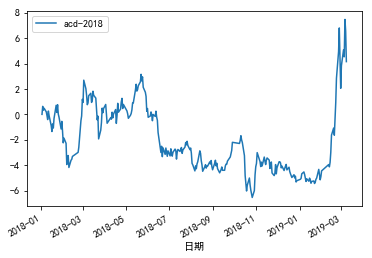

In [21]:
quant_test['acd-2018'] = ACD(quant_test['最高价'],quant_test['最低价'],quant_test['收盘价'])

quant_test[['日期','acd-2018']].plot(x='日期',y = 'acd-2018')

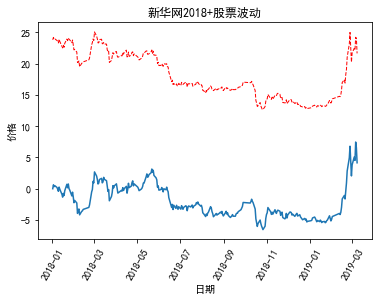

In [22]:
import pylab as pl

plt.figure()
plt.plot(quant_test['日期'],quant_test['acd-2018'])
plt.plot(quant_test['日期'],quant_test['收盘价'],color = 'red', linewidth = 1.0, linestyle = '--')
plt.xlabel('日期')
plt.ylabel('价格')
plt.title('新华网2018+股票波动')
plt.xticks(rotation=60)
plt.show()

[Text(0, 0.5, '价格'), Text(0.5, 0, '日期'), Text(0.5, 1.0, '新华网2018+股票波动')]

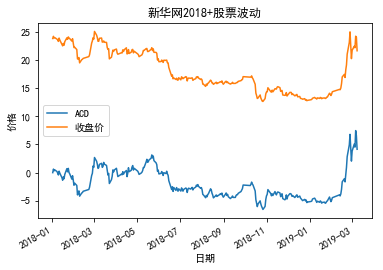

In [23]:
fig,ax = plt.subplots()
quant_test.plot(x = '日期',y = 'acd-2018',label = 'ACD',ax= ax)
quant_test.plot(x = '日期',y = '收盘价',label = '收盘价',ax= ax)
#plt.xlabel('日期')
#plt.ylabel('价格')
#plt.title('京东方2016+股票波动')
ax.set(title = '新华网2018+股票波动',xlabel = '日期',ylabel = '价格')
#plt.show()

## 动力指标MTM以分析股票价格的波动为目的
研究股票价格在波动过程中加速、减速、惯性作用以及股票价格由静到动或由动转静的现象。
当股票价格上涨强劲时，则动力指标MTM上升斜率越大，即上升越快；当股票价格下降快速时，则动力指标MTM下降也越快；
当动力指标震荡时，说明股票价格也在一定小区间范围内震荡。

投资者应该关注的是：
动力指标从下向上突破其均线时，多头为买入信号；动力指标从上向下突破其均线时，多头为卖出信号；
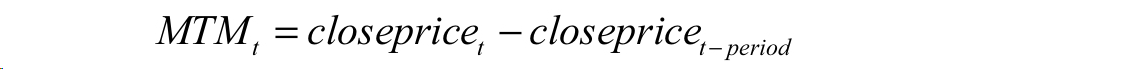

In [25]:
def MTM(closeprice,period):
    mtm = [0 for x in range(len(closeprice))]
    for i in range(period-1,len(closeprice)):
        mtm[i] = closeprice[i]-closeprice[i-period+1]
        
    return mtm

In [26]:
MTM(quant_test['收盘价'],5)

[0,
 0,
 0,
 0,
 -0.10999999999999943,
 -0.620000000000001,
 -0.6000000000000014,
 -0.07000000000000028,
 -0.16000000000000014,
 -0.8399999999999999,
 -0.7899999999999991,
 -0.9499999999999993,
 -0.9200000000000017,
 0.5100000000000016,
 1.4200000000000017,
 0.7300000000000004,
 1.4700000000000024,
 0.6499999999999986,
 -0.13000000000000256,
 -0.3200000000000003,
 -0.3100000000000023,
 -0.8900000000000006,
 -1.5999999999999979,
 -1.0899999999999999,
 -1.9299999999999997,
 -2.8299999999999983,
 -2.0,
 -1.8299999999999983,
 -2.3599999999999994,
 -0.120000000000001,
 -0.07000000000000028,
 -0.15000000000000213,
 1.1099999999999994,
 0.8500000000000014,
 2.870000000000001,
 3.09,
 3.3500000000000014,
 2.799999999999997,
 2.0699999999999967,
 1.0300000000000011,
 0.019999999999999574,
 -0.39000000000000057,
 -1.7399999999999984,
 -0.5500000000000007,
 -0.07000000000000028,
 -0.13999999999999702,
 -0.14000000000000057,
 -0.46999999999999886,
 -0.75,
 -0.060000000000002274,
 -0.98000000000000

## 变动速率线指标OSC在长期内反映股票的上涨下跌状态
变动速率线指标OSC上升则表示股票具有强劲的上升势头，变动速率线指标OSC下降则表示股票有下降趋势；变动速率线指标OSC值的变化越大，则表示股票波动越大。
变动速率线指标OSC属于超买超卖指标，OSC变动速率线是从移动平均线原理派生出来的一种分析指标，反映当日收盘价与一段时间内收盘价平均值的离差。
OSC变动速率线指标穿过0向上，此时股票有上涨势头，可视为买入信号；OSC变动速率线指标下跌跌破0线，此时股票价格将走弱，可视为卖出信号。
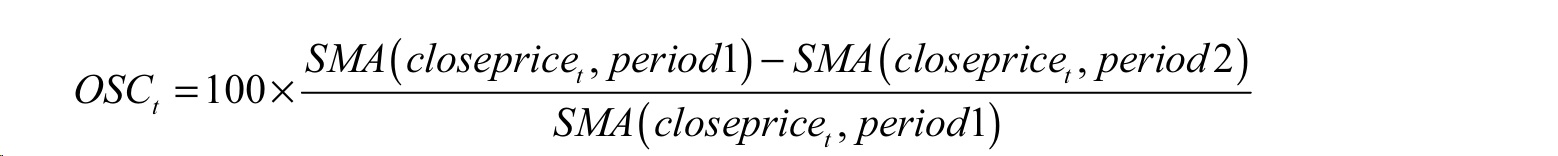

In [27]:
def OSC(closeprice,period1,period2):
    sma1 = sma(closeprice,period1)
    sma2 = sma(closeprice,period2)
    sma1[:period1-1] = [1 for i in range(period1-1)]
    sma2[:period2-1] = [1 for i in range(period2-1)]
    
    sub = [sma1[i]-sma2[i] for i in range(len(sma1))]
    
    osc = [sub[i]/sma1[i] for i in range(len(sma1))]
    return osc

In [37]:
OSC(quant_test['收盘价'],3,5)

[0.0,
 0.0,
 0.6495327102803738,
 0.6470588235294118,
 0.004465334900117487,
 -0.01732851985559568,
 -0.007425149700598783,
 -0.0058394160583943285,
 -0.008526187576126547,
 -0.010683229813664413,
 -0.013871374527112386,
 -0.017091836734694034,
 -0.007633587786259379,
 0.0012804097311138157,
 -0.007253886010362584,
 -0.01225554106910043,
 -0.014457831325301398,
 -0.024410540915395185,
 -0.0486880466472304,
 -0.03323529411764713,
 -0.012444444444444258,
 0.002346041055718412,
 0.004105571847507465,
 0.004941860465116315,
 0.0046444121915818785,
 0.0031837916063674255,
 0.013744740532959309,
 0.030213903743315562,
 0.045699614890885684,
 0.030828025477707004,
 0.003571428571428518,
 -0.003065134099616861,
 0.0025477707006370015,
 -0.012352168199737229,
 -0.02201342281879203,
 -0.03416666666666661,
 -0.015193370165745654,
 0.004359673024523225,
 0.016000000000000014,
 0.021052631578947677,
 0.007874015748031676,
 0.0031372549019606133,
 0.000526315789473451,
 -0.007456724367510052,
 -0.01

[(-0.1, 0.1)]

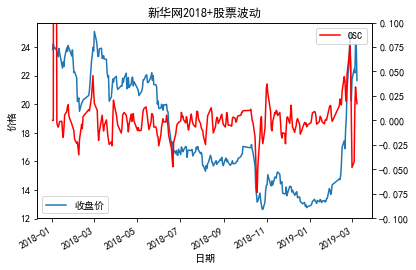

In [93]:
quant_test['osc-35'] = OSC(quant_test['收盘价'],3,5)
fig,ax = plt.subplots()
ax2 = ax.twinx()
quant_test.plot(x = '日期',y = 'osc-35',label = 'OSC',color = 'r',ax= ax2)
quant_test.plot(x = '日期',y = '收盘价',label = '收盘价',ax= ax)

#plt.xlabel('日期')
#plt.ylabel('价格')
#plt.title('京东方2016+股票波动')
ax.set(title = '新华网2018+股票波动',xlabel = '日期',ylabel = '价格')
ax2.set(ylim = (-0.1,0.1))

## 瀑布线指标PBX广泛应用于金融领域中，判断股价运行趋势
瀑布线指标在短期反映股票价格的变化率，瀑布线指标PBX上涨，则表示股价极大可能上涨；瀑布线指标PBX下降，则表示近期股票价格将下降。
瀑布线指标PBX可看作股票价格的短周期平滑曲线，其属于传统大势价格趋势线，由非线性加权移动平均线加成而来。
当股票价格上涨穿过轨道线上线时，下降概率增大；当股票价格下跌跌破轨道线下线时，则反弹几率增大，用户可以考虑介入。
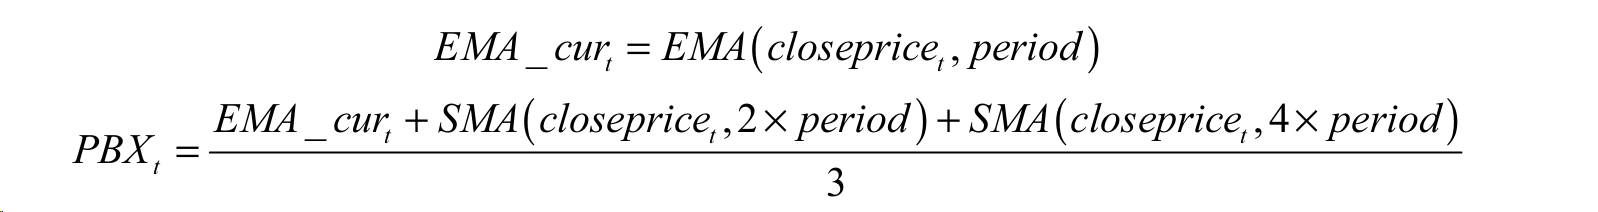

In [28]:
def PBX(closeprice,period):
    ema_cur = ema(closeprice,period)
    sma2 = sma(closeprice,2*period)
    sma4 = sma(closeprice,4*period)
    
    pbx  = [(ema_cur[i]+sma2[i]+sma4[i])/3 for i in range(len(closeprice))]
    
    return pbx        

In [55]:
PBX(quant_test['收盘价'],5)

[0.9266666666666666,
 0.9322222222222222,
 0.9492592592592591,
 0.9350617283950617,
 0.9389300411522633,
 0.9166666666666666,
 0.9177777777777777,
 0.9129629629629629,
 0.9130864197530864,
 1.8202798353909462,
 1.7796666666666667,
 1.780333333333333,
 1.7704444444444445,
 1.756296296296296,
 1.743753086419753,
 1.7346666666666666,
 1.695111111111111,
 1.6599629629629629,
 1.6194197530864196,
 2.472446502057613,
 2.4246666666666665,
 2.408111111111111,
 2.3874629629629633,
 2.377530864197531,
 2.3617983539094647,
 2.3491666666666666,
 2.377222222222222,
 2.418259259259259,
 2.444895061728395,
 2.4633744855967077,
 2.5105,
 2.5155555555555558,
 2.5245370370370375,
 2.5006358024691355,
 2.4913683127572015,
 2.4393333333333334,
 2.4468888888888887,
 2.464259259259259,
 2.475395061728395,
 2.486374485596708,
 2.512166666666667,
 2.513722222222222,
 2.505814814814815,
 2.503654320987654,
 2.499491769547325,
 2.5178333333333334,
 2.5155,
 2.5073333333333334,
 2.5080555555555555,
 2.5157592592

[Text(0, 0.5, '价格'), Text(0.5, 0, '日期'), Text(0.5, 1.0, '新华网2018+股票波动')]

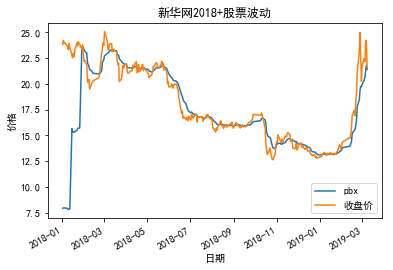

In [29]:
quant_test['pbx-5'] = PBX(quant_test['收盘价'],5)
fig,ax = plt.subplots()
quant_test.plot(x = '日期',y = 'pbx-5',label = 'pbx',ax= ax)
quant_test.plot(x = '日期',y = '收盘价',label = '收盘价',ax= ax)
#plt.xlabel('日期')
#plt.ylabel('价格')
#plt.title('京东方2016+股票波动')
ax.set(title = '新华网2018+股票波动',xlabel = '日期',ylabel = '价格')

In [58]:
quant_test['pbx-5'].max()

6.376333333333332

## 市场趋势CYE指标简单的说就是当前股票的走势
CYE趋势指标有两条线，蓝线CYEL是短期线，代表一周的走势，红线CYES是中期线，代表一个月的走势。
红线CYES更加平滑，蓝线CYEL随着股票价格震荡，正常情况下，蓝线CYEL在正负1间震荡，当股票价格异常时也出现越界情况。
当CYE市场趋势指标大于0时，股票价格就是上升趋势，值越大上涨的力度越大，此时投资者可以考虑介入；当CYE市场趋势指标小于0时，股票价格就是下降趋势，值越小下降的力度越大，此时投资者可以考虑卖出手中的股票。
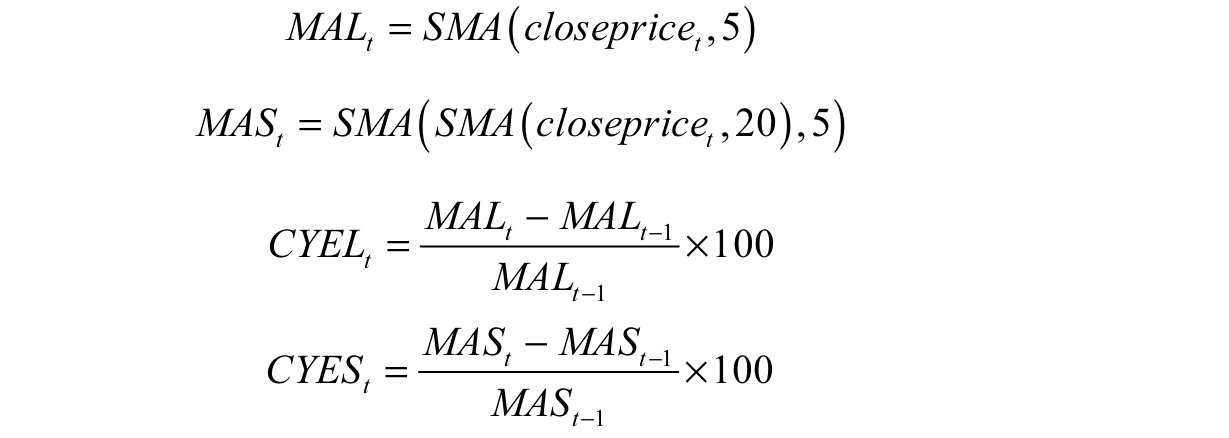

In [99]:
def CYE(closeprice):
    import numpy as np
    mal = sma(closeprice,5)
    mas = sma(np.array(sma(closeprice,20)),5)
    
    cyel = [0 for i in range(len(mal))]
    cyes = [0 for i in range(len(mas))]
    
    for i in range(1,len(mal)):
        if mal[i-1] == 0:
            cyel[i] =0
        else:
            cyel[i] = 100*((mal[i]/mal[i-1])-1)
        
        if mas[i-1] == 0:
            cyes[i] =0
        else:
            cyes[i] = 100*((mas[i]/mas[i-1])-1)
    
    return cyel,cyes

In [100]:
CYE(quant_test['收盘价'])

([0,
  0,
  0,
  0,
  0,
  -0.19227553920747598,
  -0.7538319792277592,
  -0.008439530762105463,
  -0.3544902093180258,
  -0.8131458580382889,
  -0.9137489325363068,
  -0.3102645867447906,
  -1.0979510676925819,
  -0.25349650349649755,
  1.0428533870826318,
  1.006071118820473,
  0.9874635067834259,
  1.088342827990818,
  0.46261249894861134,
  -0.4855994641661088,
  0.09254585226317058,
  -0.9077918803059637,
  -1.44202222410722,
  -1.3254152680953646,
  -1.3083296990841542,
  -3.1816173221387634,
  -2.5650387950707287,
  -1.6582349634626348,
  -2.638849195008086,
  -1.7514677103718235,
  -0.04979583706803403,
  0.07971303308091926,
  0.16925527678215424,
  1.41139051784116,
  2.881505439576615,
  3.0865961703343547,
  3.391553460863128,
  2.7797640328923956,
  3.6177058874684587,
  1.1749895090222395,
  0.49771878888427157,
  -0.5200165084605746,
  -0.31530036508463644,
  -1.0154819377393043,
  -0.42045072317523635,
  -0.667117041040366,
  -0.11051602482360368,
  0.04255319148935843,

[(-1, 25),
 Text(0, 0.5, '价格'),
 Text(0.5, 0, '日期'),
 Text(0.5, 1.0, '新华网2018+股票波动')]

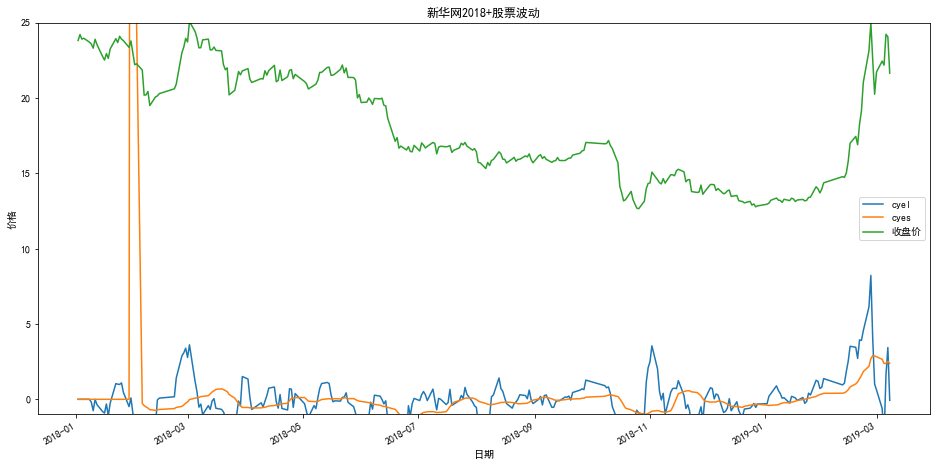

In [104]:
quant_test['cyel'],quant_test['cyes'] = CYE(quant_test['收盘价'])
fig,ax = plt.subplots(figsize = (16,8))
quant_test.plot(x = '日期',y = 'cyel',label = 'cyel',ax= ax)
quant_test.plot(x = '日期',y = 'cyes',label = 'cyes',ax= ax)
quant_test.plot(x = '日期',y = '收盘价',label = '收盘价',ax= ax)
#plt.xlabel('日期')
#plt.ylabel('价格')
#plt.title('京东方2016+股票波动')
ax.set(title = '新华网2018+股票波动',xlabel = '日期',ylabel = '价格',ylim = (-1,25))

## DDI方向标准离差指数指标
顾名思义，DDI方向标准离差指数指标，由正变为负时表示卖出信号；DDI方向标准离差指数指标，由负变为正时，表示买入信号；
DDI方向标准离差指数指标在正负1之间震动，当DDI方向标准离差指数指标在上方运行时，则长期内股票价格上涨趋势明显；
当DDI方向标准离差指数指标连续两天下降时，投资者应该规避风险。
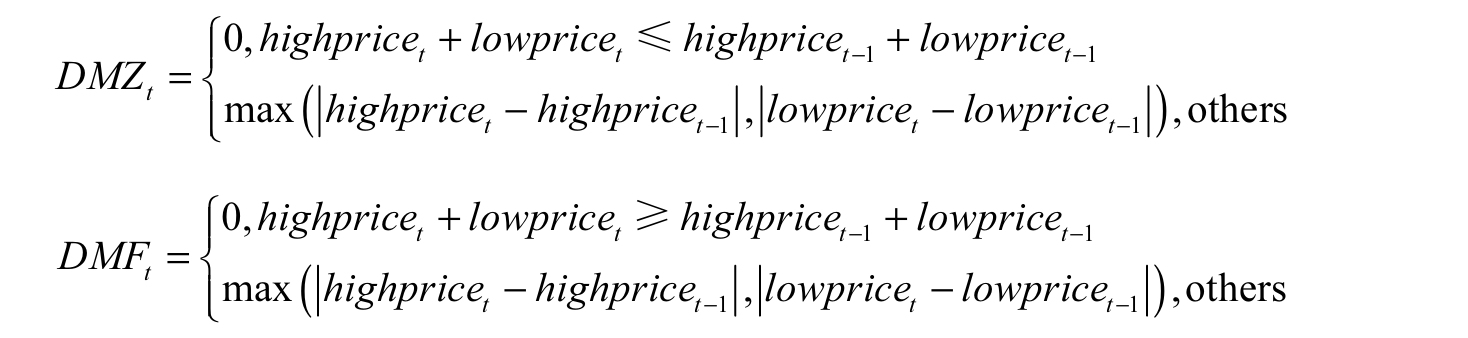

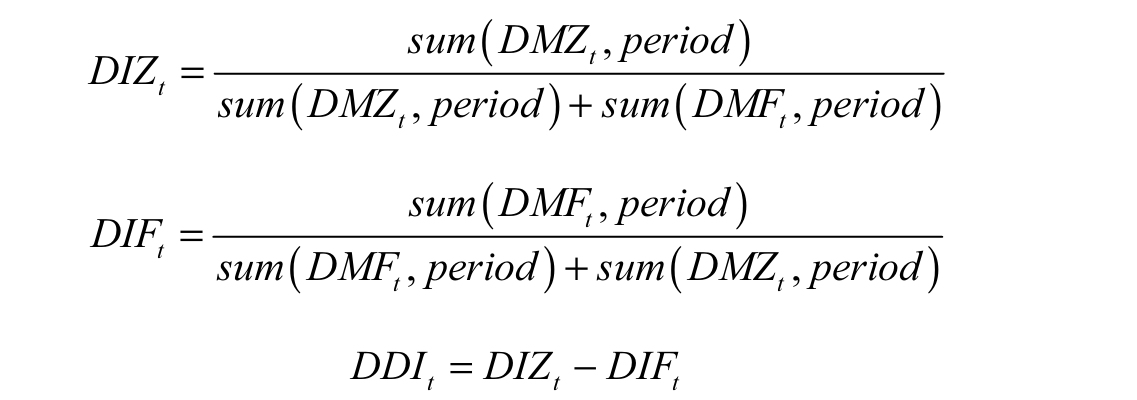

In [43]:
def DDI(highprice,lowprice,period):
    dmz = [0 for x in range(len(highprice))]
    dmf = [0 for x in range(len(highprice))]
    for i in range(1,len(highprice)):
        if (highprice[i]+lowprice[i])<=(highprice[i-1]+lowprice[i-1]):
            dmz[i] = 0
        else:
            dmz[i] = max(abs(highprice[i]-highprice[i-1]),abs(lowprice[i]-lowprice[i-1]))
            
        if (highprice[i]+lowprice[i])>=(highprice[i-1]+lowprice[i-1]):
            dmf[i] = 0
        else:
            dmf[i] = max(abs(highprice[i]-highprice[i-1]),abs(lowprice[i]-lowprice[i-1]))
            
    def sum_p(x,p):
        y = [0 for i in range(len(x))]
        for i in range(len(x)):
            if i >3:
                y[i] = sum(x[i-p+1:i+1])
            else:
                y[i] = x[i]
        return y
    
    diz = [0 for x in range(len(highprice))]
    dif = [0 for x in range(len(highprice))]
    for i in range(len(highprice)):
        if (sum_p(dmz,period)[i]+sum_p(dmf,period)[i]) == 0:
            diz[i] = 0
            dif[i] = 0
        else:
            diz[i] = sum_p(dmz,period)[i]/(sum_p(dmz,period)[i]+sum_p(dmf,period)[i])
            dif[i] = sum_p(dmf,period)[i]/(sum_p(dmz,period)[i]+sum_p(dmf,period)[i])
    
    ddi = [(diz[i]-dif[i]) for i in range(len(highprice))]
    
    return ddi                

In [44]:
DDI(quant_test['最高价'],quant_test['最低价'],5)

[0,
 1.0,
 1.0,
 -1.0,
 0.1886792452830211,
 0.06779661016949606,
 -0.5315315315315285,
 -0.46551724137931094,
 -0.18699186991869715,
 -0.40476190476190466,
 -0.5192307692307696,
 -0.44751381215469577,
 -0.5502958579881663,
 -0.20183486238532206,
 0.4685990338164261,
 0.972972972972975,
 1.0,
 1.0,
 0.4958677685950421,
 0.02654867256637261,
 -0.3987730061349648,
 -0.6399999999999977,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.7398373983739834,
 -0.7652811735941318,
 -0.6059850374064844,
 -0.12337662337662297,
 0.134453781512605,
 0.08035714285714263,
 0.9397590361445776,
 0.9695121951219507,
 0.9778761061946899,
 0.7987927565392354,
 0.8141263940520447,
 0.8565279770444765,
 0.4885245901639346,
 0.1561181434599168,
 0.17344753747323471,
 -0.1135857461024487,
 -0.6835016835016838,
 -0.23076923076923078,
 -0.2885375494071151,
 -0.2712550607287458,
 -0.21397379912663855,
 -0.29906542056074786,
 -0.6521739130434778,
 -0.7333333333333334,
 -0.7117117117117118,
 -0.6893203883495147,
 -1.0,
 -1.0

[(-2, 2),
 Text(0, 0.5, '价格'),
 Text(0.5, 0, '日期'),
 Text(0.5, 1.0, '新华网2018+股票波动')]

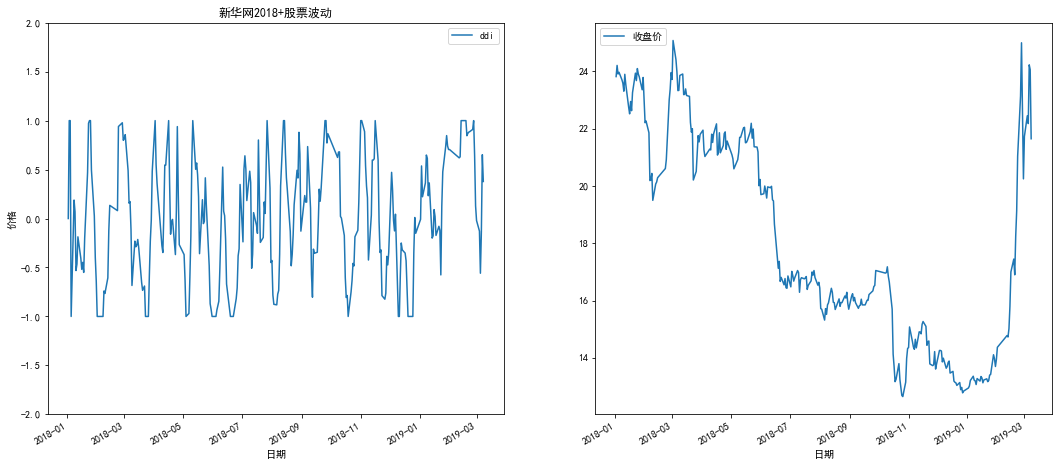

In [58]:
quant_test['ddi-5'] = DDI(quant_test['最高价'],quant_test['最低价'],5)
fig,ax = plt.subplots(figsize=(18,8),ncols=2,nrows=1)
quant_test.plot(x = '日期',y = 'ddi-5',label = 'ddi',ax= ax[0])
quant_test.plot(x = '日期',y = '收盘价',label = '收盘价',ax= ax[1])
#plt.xlabel('日期')
#plt.ylabel('价格')
#plt.title('京东方2016+股票波动')
ax[0].set(title = '新华网2018+股票波动',xlabel = '日期',ylabel = '价格',ylim = [-2,2])

## 简易波动指标EMV是根据人气和成交量的变化，构成一个完整的股价系统循环。
股票简易波动指标围绕0值上下震荡，简易波动指标EMV和股票成交量直接相关，当成交量大时，此时人气聚集，并且股票上涨趋势明显，投资者可以考虑逢低买进股票；然而当成交量逐渐表现无力时，则需要注意股票走势，投资者应该谨慎投资，逢高卖出手中股票。
EMV简易波动指标值上升，表示量跌价增；EMV简易波动指标值下降，表示量跌价跌；
EMV简易波动指标值趋向于0，代表大成交量；
EMV简易波动指标值大于0时，视为买入信号，投资者可考虑买入；
EMV简易波动指标值小于0时，视为卖出信号，投资者应该卖出股票。
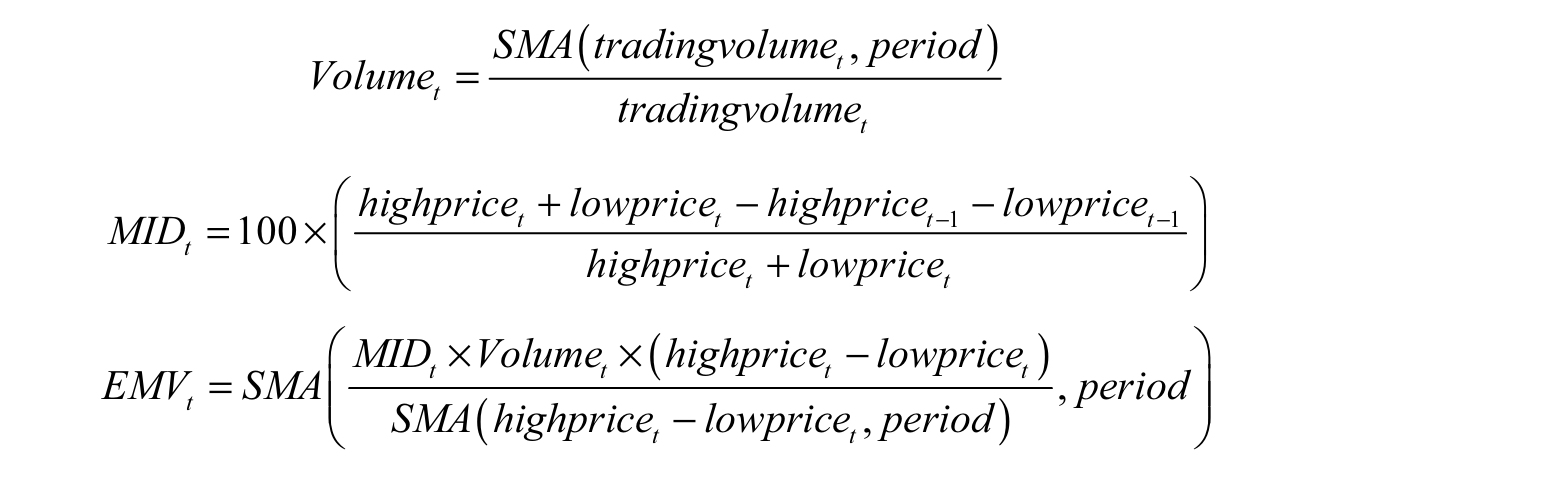

In [61]:
def EMV(highprice,lowprice,tradingvolume,period):
    import numpy as np
    Volume = [sma(tradingvolume,period)[i]/tradingvolume[i] for i in range(len(tradingvolume))]
    mid = [0 for i in range(len(highprice))]
    mm = [0 for i in range(len(highprice))]
    for i in range(1,len(highprice)):
        mid[i] = 100*(1-((highprice[i-1]+lowprice[i-1])/(highprice[i]+lowprice[i])))
        mm[i] = (mid[i]*Volume[i]*(highprice[i]-lowprice[i]))/sma(highprice-lowprice,period)[i]
    
    mm = np.array(mm)
    emv = sma(mm,period)
    
    return emv

In [62]:
EMV(quant_test['最高价'],quant_test['最低价'],quant_test['成交量'],5)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[0,
 0,
 0,
 0,
 nan,
 nan,
 nan,
 nan,
 -0.35378818165677195,
 -0.7035824409330492,
 -0.9395418912417213,
 -0.6713399333540844,
 -0.7829525536193007,
 -0.4821739280139761,
 0.5771730793155808,
 1.095022441342456,
 1.1124622866834433,
 1.2551949346595659,
 0.6727342861106612,
 0.02620494279277985,
 -0.22103264850482301,
 -0.646544777808269,
 -1.6660902356520446,
 -1.7791890417684375,
 -1.9451991700937867,
 -3.169686698407229,
 -3.313307421205649,
 -2.400941131215033,
 -2.6561804514661427,
 -2.1562531584990525,
 -0.6137353752736031,
 -0.11141397566879543,
 -0.04825434113403153,
 0.7717615481693221,
 2.1016131599949612,
 2.671941118692562,
 2.5322857172331057,
 2.401366119618788,
 2.980621460853487,
 1.428562378370468,
 0.29205587085413115,
 0.0194986458526909,
 -0.21460350909519535,
 -0.7148918358892608,
 -0.384551523917436,
 -0.6056649428457386,
 -0.33797989303324616,
 -0.3768954035258348,
 -0.4896855934228679,
 -0.7881229460048215,
 -1.1792510232919764,
 -1.109604359104767,
 -1.076498

F:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[Text(0, 0.5, '价格'), Text(0.5, 0, '日期'), Text(0.5, 1.0, '新华网2018+股票波动')]

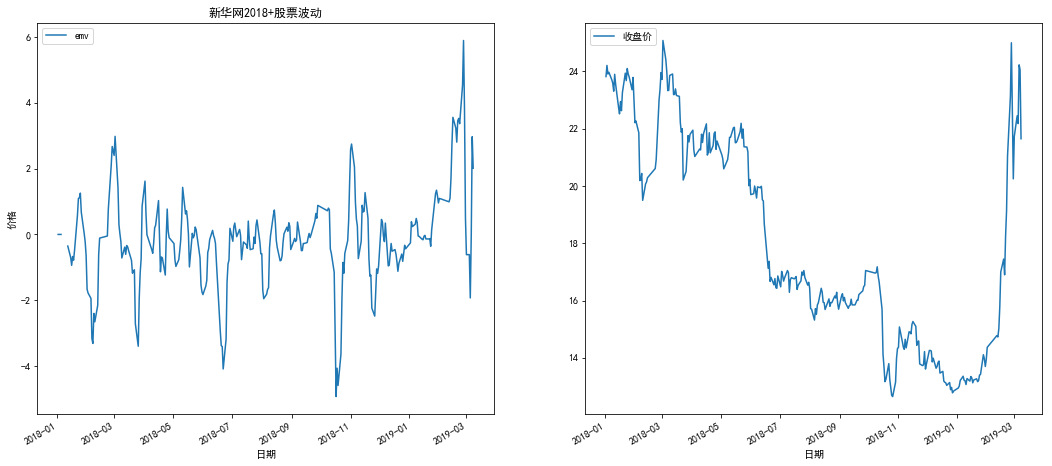

In [63]:
quant_test['emv-5'] = EMV(quant_test['最高价'],quant_test['最低价'],quant_test['成交量'],5)
fig,ax = plt.subplots(figsize=(18,8),ncols=2,nrows=1)
quant_test.plot(x = '日期',y = 'emv-5',label = 'emv',ax= ax[0])
quant_test.plot(x = '日期',y = '收盘价',label = '收盘价',ax= ax[1])
#plt.xlabel('日期')
#plt.ylabel('价格')
#plt.title('京东方2016+股票波动')
ax[0].set(title = '新华网2018+股票波动',xlabel = '日期',ylabel = '价格')

## GDX鬼道线指标是一种依靠技术手段和经验来是否买卖股票的一种指标
鬼道线指标能够更好的反映股票走势，当股票价格上涨到压力线时（压力线有3条，根据股票当前的价格定当前的压力线），用户可考虑卖出手中股票；
相反，当股票下跌到压力线时，用户应该考虑买入该股票。

GDX鬼道线指标是一种中长期参考指标，GDX鬼道线指标有3个指标，分别位于3个不同压力线水平上的趋势线上，用户可以根据鬼道线指标合理的买入和卖出；
当GDX指标有上升趋势，则表示股票上涨势头强劲；反之，当GDX鬼道线指标有下降趋势，则表示股票下跌趋势明显。
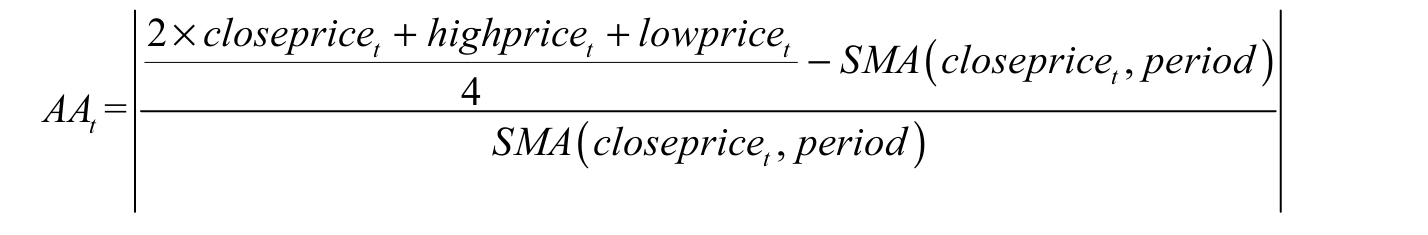


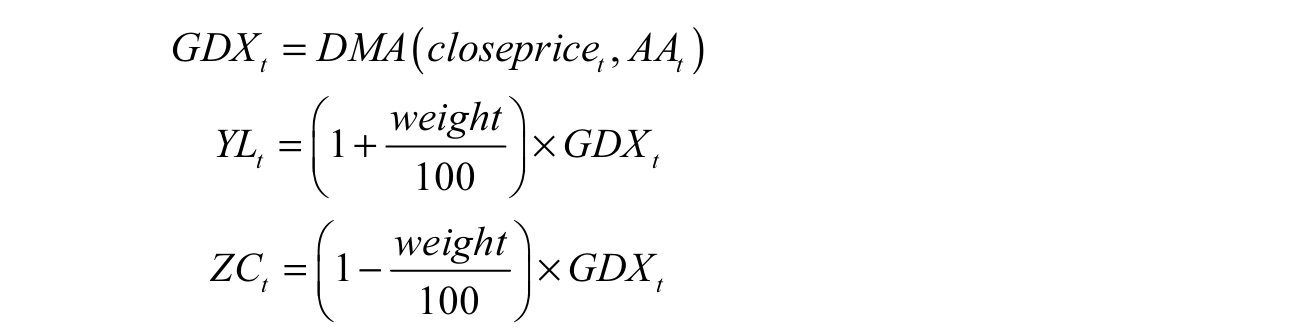

In [77]:
def GDX(highprice,lowprice,closeprice,period,weight):
    #period 简单移动平均sma周期：1<=period<=len(highprice)
    #weight 动态移动平均值dma权重：1<=weight<=100
    aa = [0 for i in range(len(highprice))]
    for i in range(len(highprice)):
        if sma(closeprice,period)[i] == 0:
            aa[i] = 0
        else:
            aa[i] = abs(((2*closeprice[i]+highprice[i]+lowprice[i])/(4*sma(closeprice,period)[i]))-1)
    
    gdx = [dma(closeprice,aa[i])[i] for i in range(len(highprice))]
    yl = [(1+(weight/100))*gdx[i] for i in range(len(highprice))]
    zc = [(1-(weight/100))*gdx[i] for i in range(len(highprice))]
    
    return gdx,yl,zc

In [78]:
GDX(quant_test['最高价'],quant_test['最低价'],quant_test['收盘价'],5,60)

([0,
  0.0,
  0.0,
  0.0,
  0.7673982171637521,
  1.178375643565596,
  1.9355092891698757,
  0.34236492161593307,
  0.13655660997484545,
  4.210821970260534,
  5.465589947743386,
  3.348437228305315,
  2.228456470002561,
  4.177975947566783,
  8.29854214737529,
  6.544930258207763,
  6.750973117859841,
  4.593201946374871,
  0.8797766360125643,
  3.761897100407882,
  0.7118439198523567,
  7.398756459438783,
  12.9554907838196,
  11.700531109036344,
  13.154328243657025,
  18.46582937094453,
  16.849261284202715,
  11.740639228989068,
  15.742557509601864,
  3.473164894420562,
  4.160687215220826,
  5.270386759260884,
  11.533898980843398,
  11.652925678689199,
  20.239495166223232,
  20.967074108510367,
  19.866705240978664,
  14.879791878762495,
  18.02284189233122,
  9.2526113916068,
  6.066910095457828,
  14.629474447788944,
  15.935425514787964,
  1.5534571209044297,
  9.123808258667978,
  7.006992884387828,
  9.209992473297696,
  10.349206099090464,
  6.92111972506775,
  2.2490647

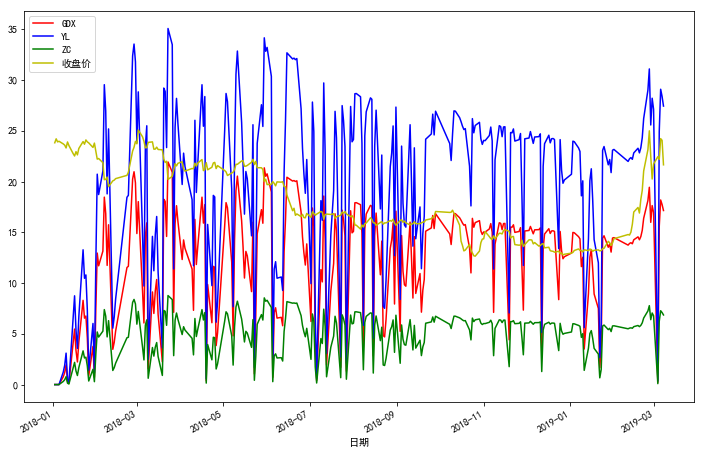

In [80]:
quant_test['gdx'],quant_test['yl'],quant_test['zc'] = GDX(quant_test['最高价'],quant_test['最低价'],quant_test['收盘价'],5,60)
fig,ax = plt.subplots(figsize = (12,8))
quant_test.plot(x = '日期',y = 'gdx',color = 'r',label = 'GDX',ax = ax)
quant_test.plot(x = '日期',y = 'yl',color = 'b',label = 'YL',ax = ax)
quant_test.plot(x = '日期',y = 'zc',color = 'g',label = 'ZC',ax = ax)
quant_test.plot(x = '日期',y = '收盘价',color = 'y',label = '收盘价',ax = ax)

## 绝路航标指标JLHB综合了动量观念、强弱指标与移动平均线的优点
在计算过程中主要研究高低价位与收市价的关系，反映价格走势的强弱与超买超卖现象。

绝路航标指标为反趋势类选股指标，是一个中短期操作指标。绝路航标指标参考值较为明显，因为只有0和50两个值之分。

通常情况下，绝路航标指标JLHB处于0值，但当JLHB出现非0值，即为50时，说明该股票有大量资金注入，后期该股票将会大涨，就算该股票不会大涨也不会大跌。
绝路航标指标可用于大盘预测，也可以作为个股的预测。
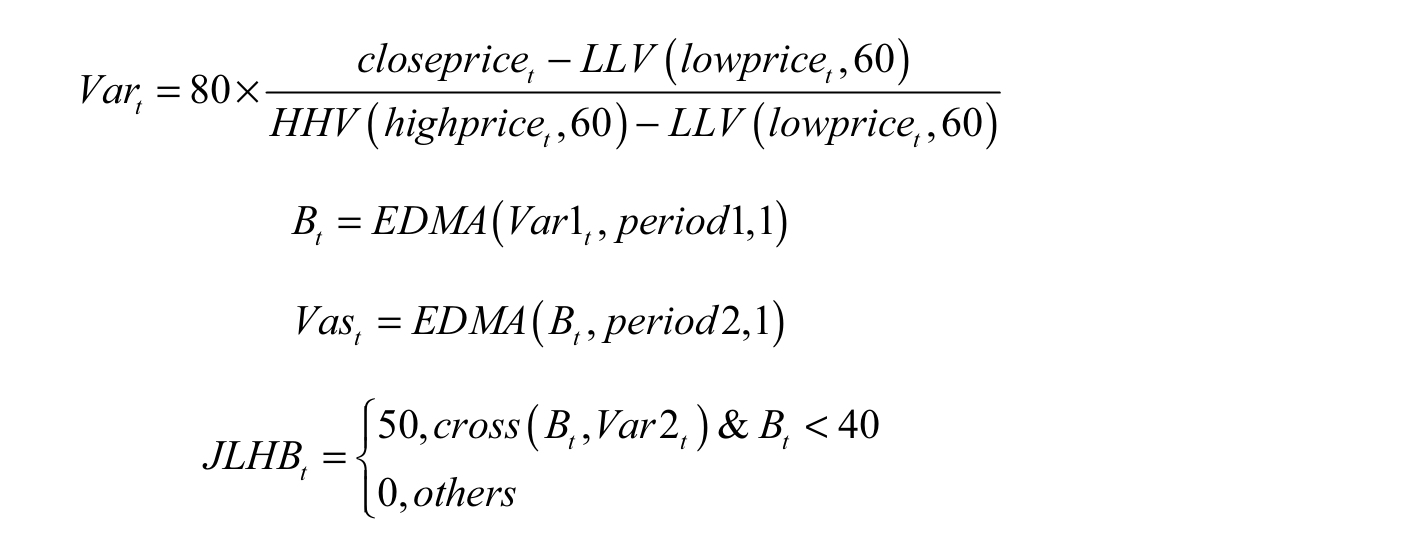

In [83]:
def JLHB(highprice,lowprice,closeprice,period1,period2):
    var = []
    for i in range(len(closeprice)):
        v = 80*((closeprice[i]-llv(lowprice,60)[i])/(hhv(highprice,60)[i]-llv(lowprice,60)[i]))
        var.append(v)
    B = edma(var,period1,1)
    vas = edma(B,period2,1)
    
    jlhb = [0 for i in range(len(closeprice))]
    for i in range(len(closeprice)):
        if (B[i]<40) and (B[i]<=vas[i]) and (B[i+1]>vas[i+1]):
            jlhb[i] = 50
    
    return jlhb

In [85]:
JLHB(quant_test['最高价'],quant_test['最低价'],quant_test['收盘价'],10,30)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
